# Introduction

The objective of this project is to get familiar with the tools and libraries commonly used in Data Science projects and to freely explore the Asteroid Data provided by NASA Jet Propulsion Laboratory in order to obtain insights about it. Although I have an intermediate knowledge of Astronomy, many of the details regarding Asteroids are unknown to me.

# Imports & Data Reading

In [1]:
from base_data_science_utils import pd, np, sp, percentage, plt, sns
from outlier_handler import OutlierHandler, OutlierCalculationMethod

pd.set_option('display.max_columns', None)

In [2]:
asteroid_df = pd.read_csv('asteroid_dataset.csv', low_memory=False)

# Data Shape and General Information

In [3]:
asteroid_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

### Column Definitions

- **id:** Object internal database ID
- **spkid:** Object primary SPK-ID (JPL Identifier)
- **full_name:** Object full name/designation
- **pdes:** Object primary designation
- **name:** Object IAU (International Astronomical Union) name
- **prefix:** Comet designation prefix
- **neo:** Near-Earth Object (NEO) flag
- **pha:** Potentially Hazardous Asteroid (PHA) flag
- **H:** Absolute magnitude parameter
- **diameter:** object diameter (from equivalent sphere) (Km)
- **albedo:** Geometric albedo
- **diameter_sigma:** 1-sigma uncertainty in object diameter (Km)
- **orbit_id:** Orbit solution ID
- **epoch:** Epoch of osculation in Julian day form (TDB)
- **epoch_mjd:** Epoch of osculation in modified Julian day form (TDB)
- **epoch_cal:** Epoch of osculation in calendar date/time form (TDB)
- **equinox:** Equinox of reference frame
- **e:** Eccentricity
- **a:** Semi-major axis (AU)
- **q:** perihelion distance (AU)
- **i:** inclination; angle with respect to x-y ecliptic plane (degrees)
- **n:** mean motion (degrees/day)
- **tp:** Time of perihelion passage (TDB)
- **tp_cal:** Time of perihelion passage (TDB)
- **per:** Sidereal Orbital Period (day)
- **per_y:** Sidereal Orbital Period (year)
- **moid:** Earth Minimum Orbit Intersection Distance (AU)
- **moid_ld:** Earth Minimum Orbit Intersection Distance (LD)
- **sigma_e:** Eccentricity (1 sigma uncertainty)
- **sigma_a:** Semi-major axis (1 sigma uncertainty) (AU)
- **sigma_q:** perihelion distance (1 sigma uncertainty) (AU)
- **sigma_i:** inclination; angle with respect to x-y ecliptic plane (1 sigma uncertainty) (degrees)
- **sigma_tp:** Time of perihelion passage (1 sigma uncertainty) (TDB)
- **sigma_per:** Sidereal Orbital Period (1 sigma uncertainty) (day)
- **class:** Orbit Classification
- **rms:** Normalized RMS orbit of fit (arcsec)

### Terms Definitions

- **NEO:** In terms of orbital elements, NEOs are asteroids and comets with perihelion distance q less than 1.3 au
- **PHA:** NEAs whose Minimum Orbit Intersection Distance (MOID) with the Earth is 0.05 au or less and whose absolute magnitude (H) is 22.0 or brighter.
- **Absolute Magnitude (H):** An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.
- **Albedo:** Albedo is ratio of the light received by a body to the light reflected by that body. Albedo values range from 0 (pitch black) to 1 (perfect reflector).
- **Eccentricity (e):** An orbital parameter describing the eccentricity of the orbit ellipse. Eccentricity e is the ratio of half the distance between the foci c to the semi-major axis a: e=c/a. For example, an orbit with e=0 is circular, e=1 is parabolic, and e between 0 and 1 is elliptic.
- **Semi-Major Axis (a):** One half of the major axis of the elliptical orbit; also the mean distance from the Sun.
- **Perihelion (q):** An orbit’s closest point to the Sun.
- **Aphelion (not included as data point):** An orbit’s farthest point to the Sun.
- **inclination (e):** Angle between the orbit plane and the ecliptic plane.
- **Mean Motion (n):** The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis. It is equal to 2 times pi (π) divided by the orbital period.
- **Time of Perihelion Passage (tp):** The time at which an object is at perihelion.
- **Period (per):** The time it takes an orbiting body to make one complete revolution around the Sun.
- **Minimum orbit intersection distance (MOID):** The distance between the closest points of the osculating orbits of two bodies.
- **Barycentric Dynamic Time (TDB):** A relativistic coordinate time scale, intended for astronomical use as a time standard to take account of time dilation when calculating orbits and astronomical ephemerides of planets, asteroids, comets and interplanetary spacecraft in the Solar System.
- **Lunar Distance (LD):** The term LD (Lunar Distance) refers to the average distance between the Earth and Moon. For data reported on this site, we use a mean semimajor axis for the moon of 384400 km (~.002570 au) to define one LD.

In [4]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [5]:
asteroid_df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [6]:
asteroid_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


# Data Understanding

### Identifier Columns

In [7]:
print("Number of Unique Values for Identifier Columns\n")
print(f"IDs = {asteroid_df['id'].nunique()}")
print(f"spkid = {asteroid_df['spkid'].nunique()}")
print(f"Full Name = {asteroid_df['full_name'].nunique()}")
print(f"PDES = {asteroid_df['pdes'].nunique()}")
print(f"Name = {asteroid_df['name'].nunique()}")
print(f"Prefix = {asteroid_df['prefix'].nunique()}")

Number of Unique Values for Identifier Columns

IDs = 958524
spkid = 958524
Full Name = 958524
PDES = 958524
Name = 22064
Prefix = 1


In [8]:
# Prefix column seems odd, checking its values
asteroid_df['prefix'].value_counts(dropna=False)

prefix
NaN    958506
A          18
Name: count, dtype: int64

In [9]:
# Looking for duplicates
asteroid_df.loc[asteroid_df.duplicated]

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms


In [10]:
# Looking for duplicates
asteroid_df.loc[asteroid_df.duplicated(subset=['spkid'])].head(5)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms


### Object Type Columns

In [11]:
print(asteroid_df['neo'].value_counts(dropna=False))
print(asteroid_df['neo'].value_counts(dropna=False, normalize=True)*100)

neo
N      935625
Y       22895
NaN         4
Name: count, dtype: int64
neo
N      97.611014
Y       2.388568
NaN     0.000417
Name: proportion, dtype: float64


In [12]:
print(asteroid_df['pha'].value_counts(dropna=False))
print(asteroid_df['pha'].value_counts(dropna=False, normalize=True)*100)

pha
N      936537
NaN     19921
Y        2066
Name: count, dtype: int64
pha
N      97.706161
NaN     2.078300
Y       0.215540
Name: proportion, dtype: float64


In [13]:
asteroid_df['orbit_id'].value_counts(dropna=False)

orbit_id
1            50142
JPL 1        47494
JPL 2        34568
JPL 3        29931
12           29136
             ...  
MPO484092        1
MPO484096        1
MPO484101        1
MPO484102        1
E2020J48         1
Name: count, Length: 4690, dtype: int64

In [14]:
asteroid_df['equinox'].value_counts(dropna=False)

equinox
J2000    958524
Name: count, dtype: int64

In [15]:
asteroid_df['class'].value_counts(dropna=False)

class
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: count, dtype: int64

### Numeric Columns

Due to the great amount of numeric columns, many of them have been deliberately ignored in this analysis.

In [16]:
asteroid_df['H'].describe()

count    952261.000000
mean         16.906411
std           1.790405
min          -1.100000
25%          16.100000
50%          16.900000
75%          17.714000
max          33.200000
Name: H, dtype: float64

In [17]:
asteroid_df['diameter'].describe()

count    136209.000000
mean          5.506429
std           9.425164
min           0.002500
25%           2.780000
50%           3.972000
75%           5.765000
max         939.400000
Name: diameter, dtype: float64

In [18]:
asteroid_df['albedo'].describe()

count    135103.000000
mean          0.130627
std           0.110323
min           0.001000
25%           0.053000
50%           0.079000
75%           0.190000
max           1.000000
Name: albedo, dtype: float64

In [19]:
asteroid_df['e'].describe()

count    958524.000000
mean          0.156116
std           0.092643
min           0.000000
25%           0.092193
50%           0.145002
75%           0.200650
max           1.855356
Name: e, dtype: float64

In [20]:
asteroid_df['a'].describe()

count    958524.000000
mean          2.902143
std          39.719503
min      -14702.447872
25%           2.387835
50%           2.646969
75%           3.001932
max       33488.895955
Name: a, dtype: float64

In [21]:
asteroid_df['q'].describe()

count    958524.000000
mean          2.394887
std           2.139246
min           0.070511
25%           1.971401
50%           2.225816
75%           2.578315
max          80.398819
Name: q, dtype: float64

In [22]:
asteroid_df['tp'].describe()

count    9.585240e+05
mean     2.458856e+06
std      1.580506e+03
min      2.283183e+06
25%      2.458560e+06
50%      2.458945e+06
75%      2.459361e+06
max      2.546362e+06
Name: tp, dtype: float64

In [23]:
asteroid_df['per'].describe()

count    9.585200e+05
mean     5.085344e+03
std      2.308961e+06
min      1.511918e+02
25%      1.347738e+03
50%      1.572976e+03
75%      1.899765e+03
max      2.238462e+09
Name: per, dtype: float64

In [24]:
asteroid_df['moid'].describe()

count    9.386030e+05
mean     1.415162e+00
std      2.156731e+00
min      4.544120e-07
25%      9.797020e-01
50%      1.240850e+00
75%      1.593370e+00
max      7.947660e+01
Name: moid, dtype: float64

### Insights

- **spkid** and **full_name** will be enough to identify asteroids, so **id**, **pdes**, **name** and **prefix** will be dropped
- **neo**, **pha**, **orbit_id** and **class** will be changed to categorical values for easier handling
- **epoch_mjd** will be changed to float64 for easier handling
- **equinox** will be dropped since it has a single value
- **om**, **w**, **na**, **ad** will be dropped because I have not found in my sources information about them and do not have previous knowledge
- sigma columns will be dropped for now, I do not plan to use them

# Data Cleaning

In [25]:
analysis_df = asteroid_df.copy()

In [26]:
analysis_df = analysis_df.drop(['id',
                                'pdes',
                                'name',
                                'prefix',
                                'equinox',
                                'om',
                                'w',
                                'ma',
                                'ad',
                                'sigma_a',
                                'sigma_q',
                                'sigma_i',
                                'sigma_om',
                                'sigma_w',
                                'sigma_ma',
                                'sigma_ad',
                                'sigma_n',
                                'sigma_tp',
                                'sigma_per'], axis=1)

In [27]:
analysis_df['neo'] = analysis_df['neo'].astype('category')
analysis_df['pha'] = analysis_df['pha'].astype('category')
analysis_df['orbit_id'] = analysis_df['orbit_id'].astype('category')
analysis_df['class'] = analysis_df['class'].astype('category')
analysis_df['epoch_mjd'] = analysis_df['epoch_mjd'].astype('float')

In [28]:
analysis_df.head()

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
0,2000001,1 Ceres,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600.0,20190427.0,0.076009,2.769165,2.558684,10.594067,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,MBA,0.43301
1,2000002,2 Pallas,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000.0,20200531.0,0.229972,2.773841,2.135935,34.832932,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,MBA,0.35936
2,2000003,3 Juno,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000.0,20200531.0,0.256936,2.668285,1.982706,12.991043,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,MBA,0.33848
3,2000004,4 Vesta,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600.0,20190427.0,0.088721,2.361418,2.151909,7.141771,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,MBA,0.39980
4,2000005,5 Astraea,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000.0,20200531.0,0.190913,2.574037,2.082619,5.367427,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,MBA,0.52191


In [29]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   spkid           958524 non-null  int64   
 1   full_name       958524 non-null  object  
 2   neo             958520 non-null  category
 3   pha             938603 non-null  category
 4   H               952261 non-null  float64 
 5   diameter        136209 non-null  float64 
 6   albedo          135103 non-null  float64 
 7   diameter_sigma  136081 non-null  float64 
 8   orbit_id        958524 non-null  category
 9   epoch           958524 non-null  float64 
 10  epoch_mjd       958524 non-null  float64 
 11  epoch_cal       958524 non-null  float64 
 12  e               958524 non-null  float64 
 13  a               958524 non-null  float64 
 14  q               958524 non-null  float64 
 15  i               958524 non-null  float64 
 16  n               958524 non-null  float

In [30]:
analysis_df.isna().sum()

spkid                  0
full_name              0
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
class                  0
rms                    2
dtype: int64

# Exploratory Data Analysis

In this section I will explore the dataset and its features relationships, focused on Potentially Hazardous Asteroids

## Setup

In [31]:
TOTAL_ROWS = len(asteroid_df.index)

def to_perihelion(a: float, e: float) -> float:
    return a * (1 - e)


def to_aphelion(a: float, e: float) -> float:
    return a * (1 + e)

sns.set_theme(style='whitegrid')
sns.set_context('notebook')

oh = OutlierHandler()

In [32]:
pha_df = analysis_df[(analysis_df['pha'].eq('Y'))]

TOTAL_PHA_ROWS = len(pha_df.index)

In [33]:
pha_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2066 entries, 1565 to 958521
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   spkid           2066 non-null   int64   
 1   full_name       2066 non-null   object  
 2   neo             2066 non-null   category
 3   pha             2066 non-null   category
 4   H               2066 non-null   float64 
 5   diameter        221 non-null    float64 
 6   albedo          200 non-null    float64 
 7   diameter_sigma  189 non-null    float64 
 8   orbit_id        2066 non-null   category
 9   epoch           2066 non-null   float64 
 10  epoch_mjd       2066 non-null   float64 
 11  epoch_cal       2066 non-null   float64 
 12  e               2066 non-null   float64 
 13  a               2066 non-null   float64 
 14  q               2066 non-null   float64 
 15  i               2066 non-null   float64 
 16  n               2066 non-null   float64 
 17  tp            

## Features of Potentially Hazardous Asteroids

### Outliers and Missing Values

In [34]:
pha_outlier_information = oh.get_outliers_information(df=pha_df, output_dataframes=False)

spkid
Missing Values =         0 (0.0 %)
Outlier Values =         23 (1.1133 %)
Non Outlier Values =     2043 (98.8867 %)


H
Missing Values =         0 (0.0 %)
Outlier Values =         19 (0.9197 %)
Non Outlier Values =     2047 (99.0803 %)


diameter
Missing Values =         1845 (89.303 %)
Outlier Values =         6 (0.2904 %)
Non Outlier Values =     215 (10.4066 %)


albedo
Missing Values =         1866 (90.3195 %)
Outlier Values =         0 (0.0 %)
Non Outlier Values =     200 (9.6805 %)


diameter_sigma
Missing Values =         1877 (90.8519 %)
Outlier Values =         4 (0.1936 %)
Non Outlier Values =     185 (8.9545 %)


epoch
Missing Values =         0 (0.0 %)
Outlier Values =         70 (3.3882 %)
Non Outlier Values =     1996 (96.6118 %)


epoch_mjd
Missing Values =         0 (0.0 %)
Outlier Values =         70 (3.3882 %)
Non Outlier Values =     1996 (96.6118 %)


epoch_cal
Missing Values =         0 (0.0 %)
Outlier Values =         69 (3.3398 %)
Non Outlier Values =     1

### Absolute Magnitude Parameter (H)

In [35]:
pha_df['H'].describe()

count    2066.000000
mean       20.070387
std         1.461095
min        14.000000
25%        19.200000
50%        20.300000
75%        21.200000
max        22.400000
Name: H, dtype: float64

In [36]:
pha_outlier_information['H']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 19,
 'outlier_values_percentage': 0.9197,
 'non_outlier_values_count': 2047,
 'non_outlier_values_percentage': 99.0803}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


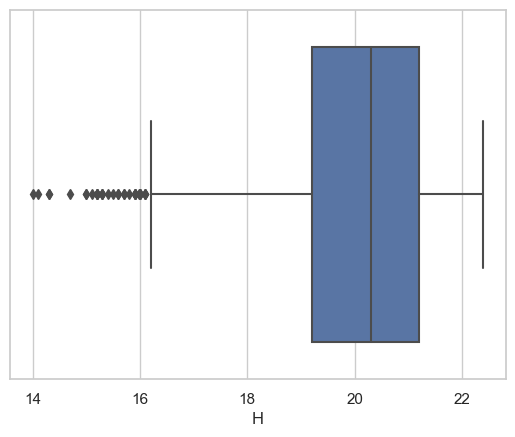

In [37]:
sns.boxplot(x=pha_df['H'])
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


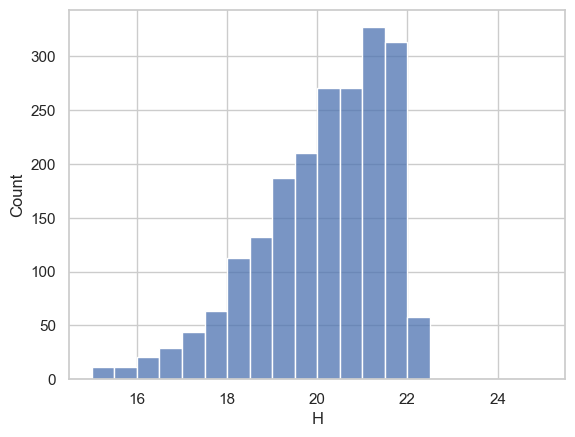

In [38]:
sns.histplot(x=pha_df['H'], binrange=(15,25), bins=20)
plt.show()

### Diameter

In [39]:
pha_df['diameter'].describe()

count    221.000000
mean       0.906597
std        1.021980
min        0.083000
25%        0.330000
50%        0.554000
75%        1.052000
max        7.000000
Name: diameter, dtype: float64

In [40]:
pha_outlier_information['diameter']

{'missing_values_count': 1845,
 'missing_values_percentage': 89.303,
 'outlier_values_count': 6,
 'outlier_values_percentage': 0.2904,
 'non_outlier_values_count': 215,
 'non_outlier_values_percentage': 10.4066}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


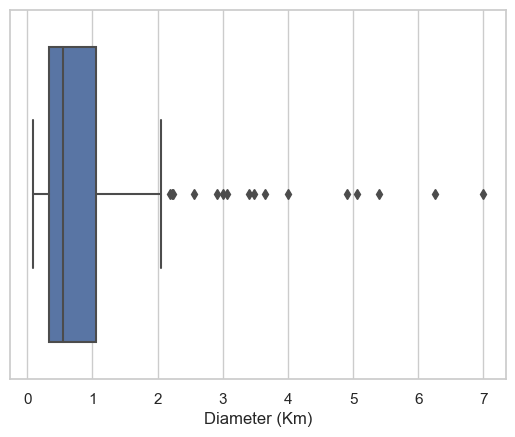

In [41]:
y = sns.boxplot(x=pha_df['diameter'])
y.set(xlabel='Diameter (Km)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


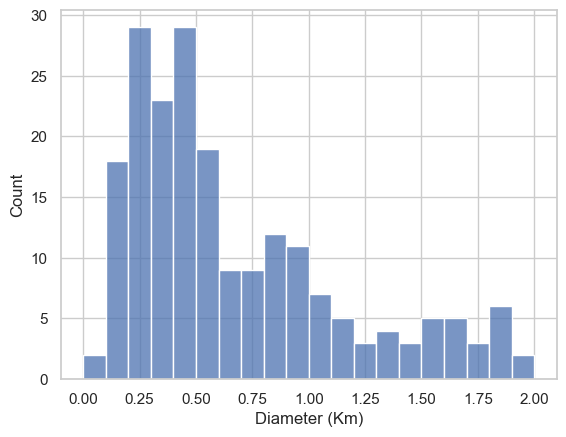

In [42]:
y = sns.histplot(x=pha_df['diameter'], binrange=(0,2), bins=20)
y.set(xlabel='Diameter (Km)')
plt.show()

### Albedo

In [43]:
pha_df['albedo'].describe()

count    200.000000
mean       0.187977
std        0.136565
min        0.012000
25%        0.078250
50%        0.157000
75%        0.272500
max        0.578000
Name: albedo, dtype: float64

In [44]:
pha_outlier_information['albedo']

{'missing_values_count': 1866,
 'missing_values_percentage': 90.3195,
 'outlier_values_count': 0,
 'outlier_values_percentage': 0.0,
 'non_outlier_values_count': 200,
 'non_outlier_values_percentage': 9.6805}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


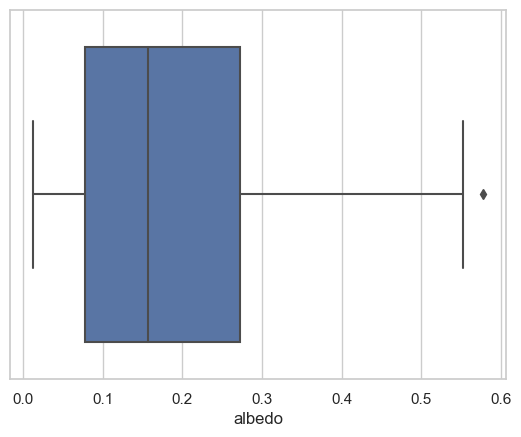

In [45]:
sns.boxplot(x=pha_df['albedo'])
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


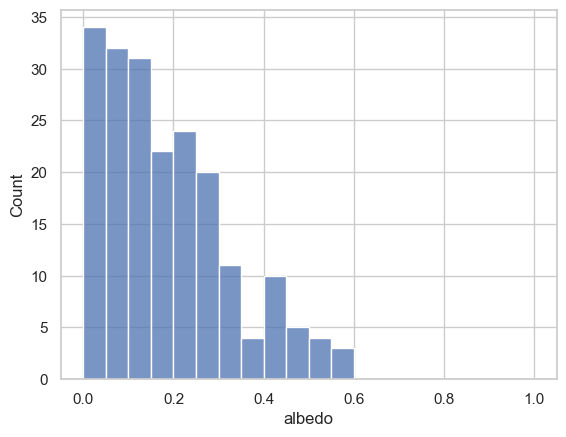

In [46]:
sns.histplot(x=pha_df['albedo'], binrange=(0,1), bins=20)
plt.show()

### Orbit ID

In [47]:
pha_df['orbit_id'].value_counts(dropna=False)

orbit_id
18           48
19           45
17           42
15           41
32           39
             ..
MPO483572     0
MPO483575     0
MPO483576     0
MPO483577     0
MPO74443      0
Name: count, Length: 4690, dtype: int64

### Eccentricity (e)

In [48]:
pha_df['e'].describe()

count    2066.000000
mean        0.533350
std         0.177155
min         0.012176
25%         0.414275
50%         0.556790
75%         0.654417
max         0.955945
Name: e, dtype: float64

In [49]:
pha_outlier_information['e']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 0,
 'outlier_values_percentage': 0.0,
 'non_outlier_values_count': 2066,
 'non_outlier_values_percentage': 100.0}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='e'>

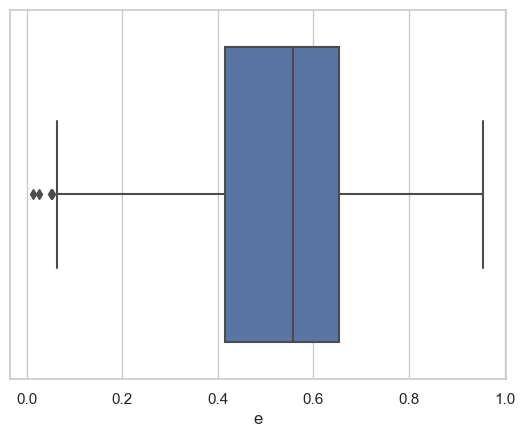

In [50]:
sns.boxplot(x=pha_df['e'])

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


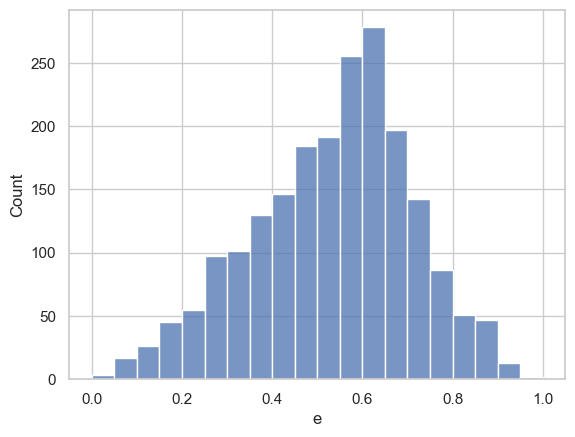

In [51]:
sns.histplot(x=pha_df['e'], binrange=(0,1), bins=20)
plt.show()

### Semi-Major Axis (a)

In [52]:
pha_df['a'].describe()

count    2066.000000
mean        1.772633
std         0.673949
min         0.635237
25%         1.288742
50%         1.730650
75%         2.209964
max        17.774243
Name: a, dtype: float64

In [53]:
pha_outlier_information['a']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 2,
 'outlier_values_percentage': 0.0968,
 'non_outlier_values_count': 2064,
 'non_outlier_values_percentage': 99.9032}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


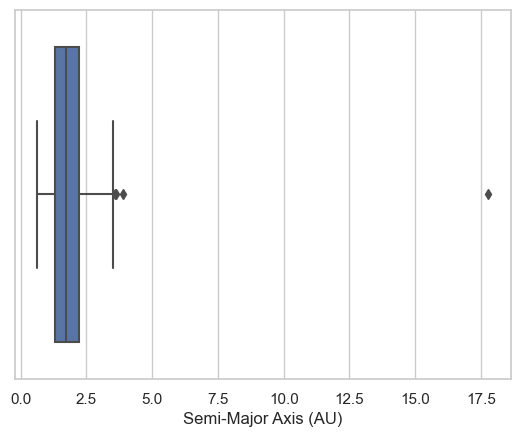

In [54]:
y = sns.boxplot(x=pha_df['a'])
y.set(xlabel='Semi-Major Axis (AU)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


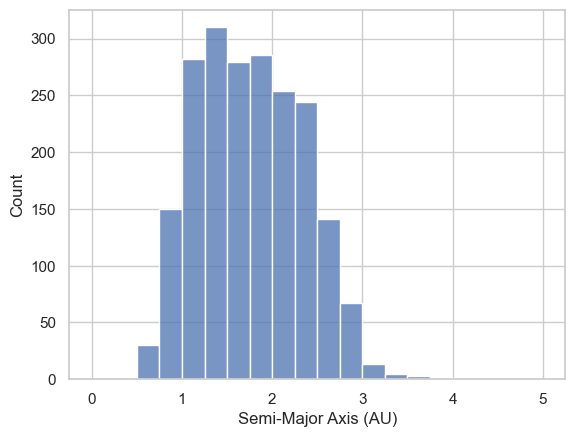

In [55]:
y = sns.histplot(x=pha_df['a'], binrange=(0,5), bins=20)
y.set(xlabel='Semi-Major Axis (AU)')
plt.show()

In [56]:
# Percentage of PHA's with a > 1
percentage(len(pha_df[pha_df['a'] > 1].index), TOTAL_PHA_ROWS)

91.2875

In [57]:
# Percentage of PHA's with a > 2
percentage(len(pha_df[pha_df['a'] > 2].index), TOTAL_PHA_ROWS)

35.2856

### Perihelion Distance (q)

In [58]:
pha_df['q'].describe()

count    2066.000000
mean        0.759974
std         0.220404
min         0.092924
25%         0.617920
50%         0.817229
75%         0.940825
max         1.064284
Name: q, dtype: float64

In [59]:
pha_outlier_information['q']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 1,
 'outlier_values_percentage': 0.0484,
 'non_outlier_values_count': 2065,
 'non_outlier_values_percentage': 99.9516}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


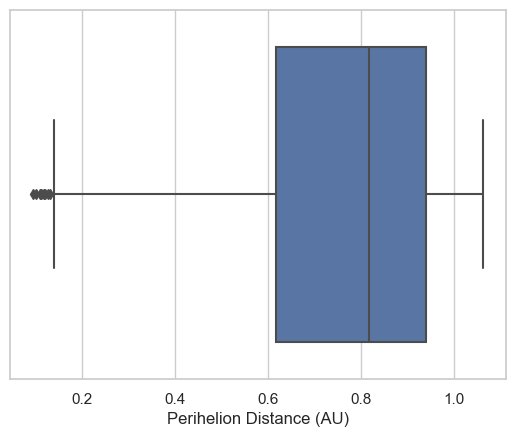

In [60]:
y = sns.boxplot(x=pha_df['q'])
y.set(xlabel='Perihelion Distance (AU)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


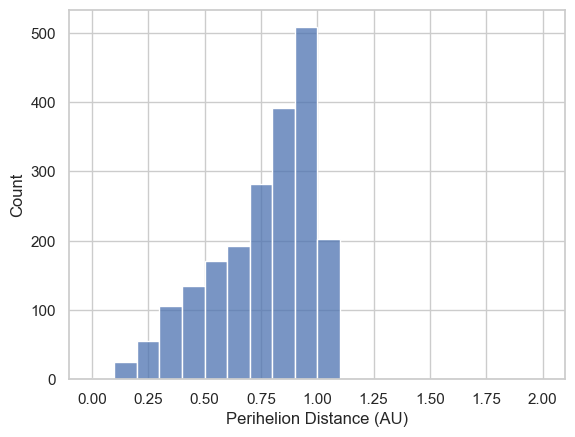

In [61]:
y = sns.histplot(x=pha_df['q'], binrange=(0,2), bins=20)
y.set(xlabel='Perihelion Distance (AU)')
plt.show()

In [62]:
# Percentage of PHA's with q < 1
percentage(len(pha_df[pha_df['q'] < 1].index), TOTAL_PHA_ROWS)

90.2227

### Inclination (i)

In [63]:
pha_df['i'].describe()

count    2066.000000
mean       13.817613
std        11.875101
min         0.146234
25%         5.153328
50%         9.762870
75%        19.569331
max        75.375570
Name: i, dtype: float64

In [64]:
pha_outlier_information['i']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 35,
 'outlier_values_percentage': 1.6941,
 'non_outlier_values_count': 2031,
 'non_outlier_values_percentage': 98.3059}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


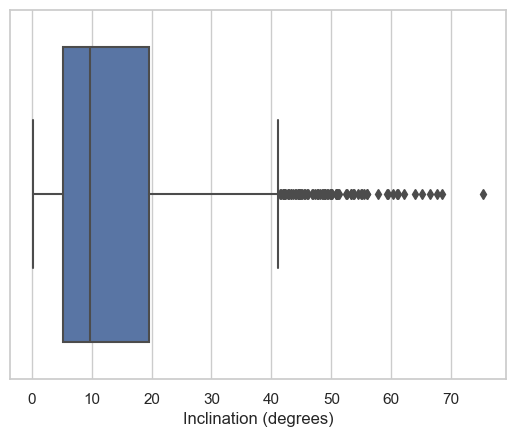

In [65]:
y = sns.boxplot(x=pha_df['i'])
y.set(xlabel='Inclination (degrees)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


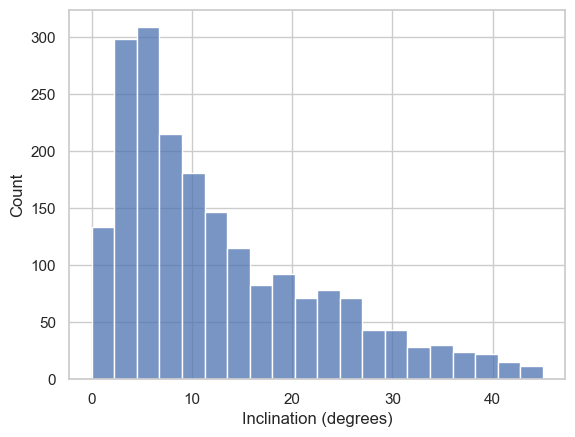

In [66]:
y = sns.histplot(x=pha_df['i'], binrange=(0,45), bins=20)
y.set(xlabel='Inclination (degrees)')
plt.show()

### Sidereal Orbital Period (per)

In [67]:
pha_df['per'].describe()

count     2066.000000
mean       903.330279
std        720.331827
min        184.927905
25%        534.376929
50%        831.595993
75%       1199.986031
max      27370.649665
Name: per, dtype: float64

In [68]:
pha_outlier_information['per']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 1,
 'outlier_values_percentage': 0.0484,
 'non_outlier_values_count': 2065,
 'non_outlier_values_percentage': 99.9516}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


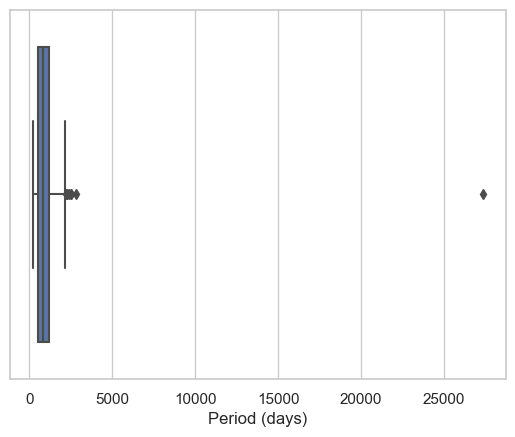

In [69]:
y = sns.boxplot(x=pha_df['per'])
y.set(xlabel='Period (days)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


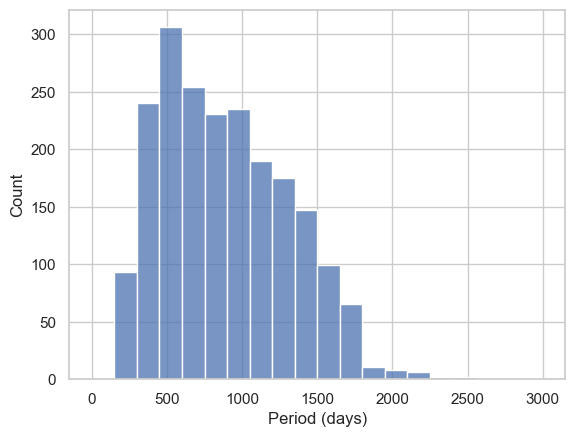

In [70]:
y = sns.histplot(x=pha_df['per'], binrange=(0,3000), bins=20)
y.set(xlabel='Period (days)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


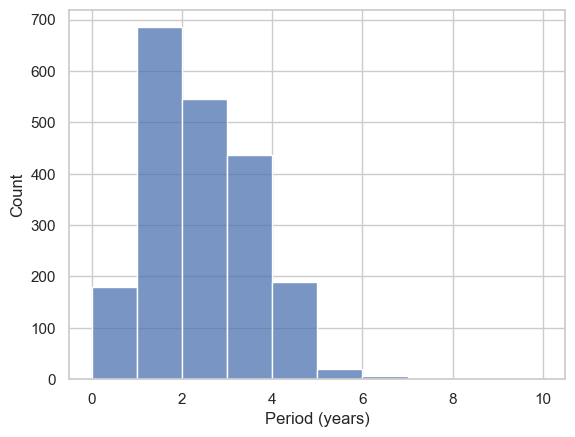

In [71]:
y = sns.histplot(x=pha_df['per_y'], binrange=(0,10), bins=10)
y.set(xlabel='Period (years)')
plt.show()

In [72]:
# Percentage of PHA's with period of around 1~4 years
percentage(len(pha_df[pha_df['per_y'].between(1, 4)].index), TOTAL_PHA_ROWS)

80.7357

### Earth Minimum Orbit Intersection Distance (moid)

In [73]:
pha_df['moid'].describe()

count    2066.000000
mean        0.023670
std         0.014339
min         0.000027
25%         0.011269
50%         0.023301
75%         0.035197
max         0.049991
Name: moid, dtype: float64

In [74]:
pha_outlier_information['moid']

{'missing_values_count': 0,
 'missing_values_percentage': 0.0,
 'outlier_values_count': 0,
 'outlier_values_percentage': 0.0,
 'non_outlier_values_count': 2066,
 'non_outlier_values_percentage': 100.0}

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


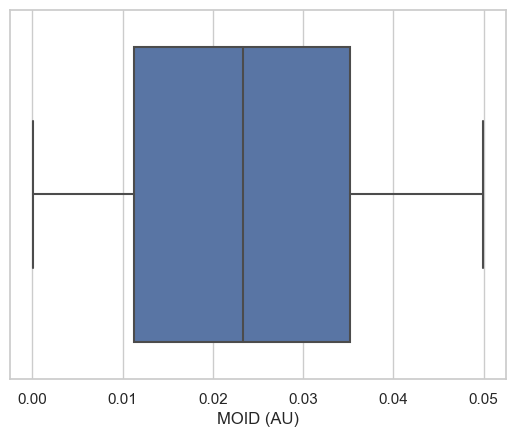

In [75]:
y = sns.boxplot(x=pha_df['moid'])
y.set(xlabel='MOID (AU)')
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


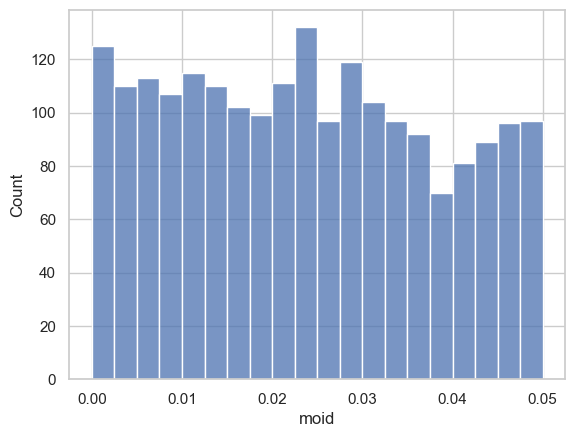

In [76]:
sns.histplot(x=pha_df['moid'], binrange=(0,0.05), bins=20)
y.set(xlabel='MOID (AU)')
plt.show()

In [77]:
# Percentage of PHA's with MOID < 0.02
percentage(len(pha_df[pha_df['moid'] < 0.02].index), TOTAL_PHA_ROWS)

42.6428

### Class

In [78]:
pha_df['class'].describe()

count     2066
unique       4
top        APO
freq      1768
Name: class, dtype: object

In [79]:
pha_df['class'].isna().sum()

0

In [80]:
class_series = pha_df['class'].value_counts(dropna=False).head(4)
class_series

class
APO    1768
ATE     174
AMO     118
IEO       6
Name: count, dtype: int64

In [81]:
# Percentage of PHA's of APO Class
percentage(len(pha_df[pha_df['class'].eq('APO')].index), TOTAL_PHA_ROWS)

85.576

### Univariate Analysis Insights

- Asteroid Classes:
  - **Apollo (APO):** Near-Earth asteroid orbits which cross the Earth's orbit similar to that of 1862 Apollo (a > 1.0 AU; q < 1.017 AU).
  - **Aten (ATE):** Near-Earth asteroid orbits similar to that of 2062 Aten (a < 1.0 au; Q > 0.983 au).
  - **Amor (AMO):** Near-Earth asteroid orbits similar to that of 1221 Amor (1.017 au < q < 1.3 au).
  - **Atira (IEO):** An asteroid orbit contained entirely within the orbit of the Earth (Q < 0.983 au). Also known as an Interior Earth Object.
- Altough there are no missing values for Absolute Magnitude, more than 90% of the values for Albedo are missing. Those could be used to calculate the missing 89% values for Diameter.
- A few PHA's, have almost circular orbit, with e close to 0, but most of them have e between 0.5 and 0.7
- 91% of PHA's have Semi-Major Axis (a) greater than 1 AU and 35% greater than 2 AU
- 90% of PHA's have Perihelion distance (q) less than 1 AU
- 80% of PHA's have period betweeon 1 to 4 years
- 42% of PHA's have moid less than 0.02 AU or 3 million kilometers
- 85% of PHA's belong to the Apollo Class, with Semi-Major Axis (a) greater than 1 AU and Perihelion distance lesser than 1.017 AU

## Features Relationships

In [82]:
# Of the near earth objects, what percent of them are potentially hazardous asteroids?
analysis_df[analysis_df['neo'].eq('Y')]['pha'].value_counts(normalize=True)*100

pha
N    90.975802
Y     9.024198
Name: proportion, dtype: float64

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

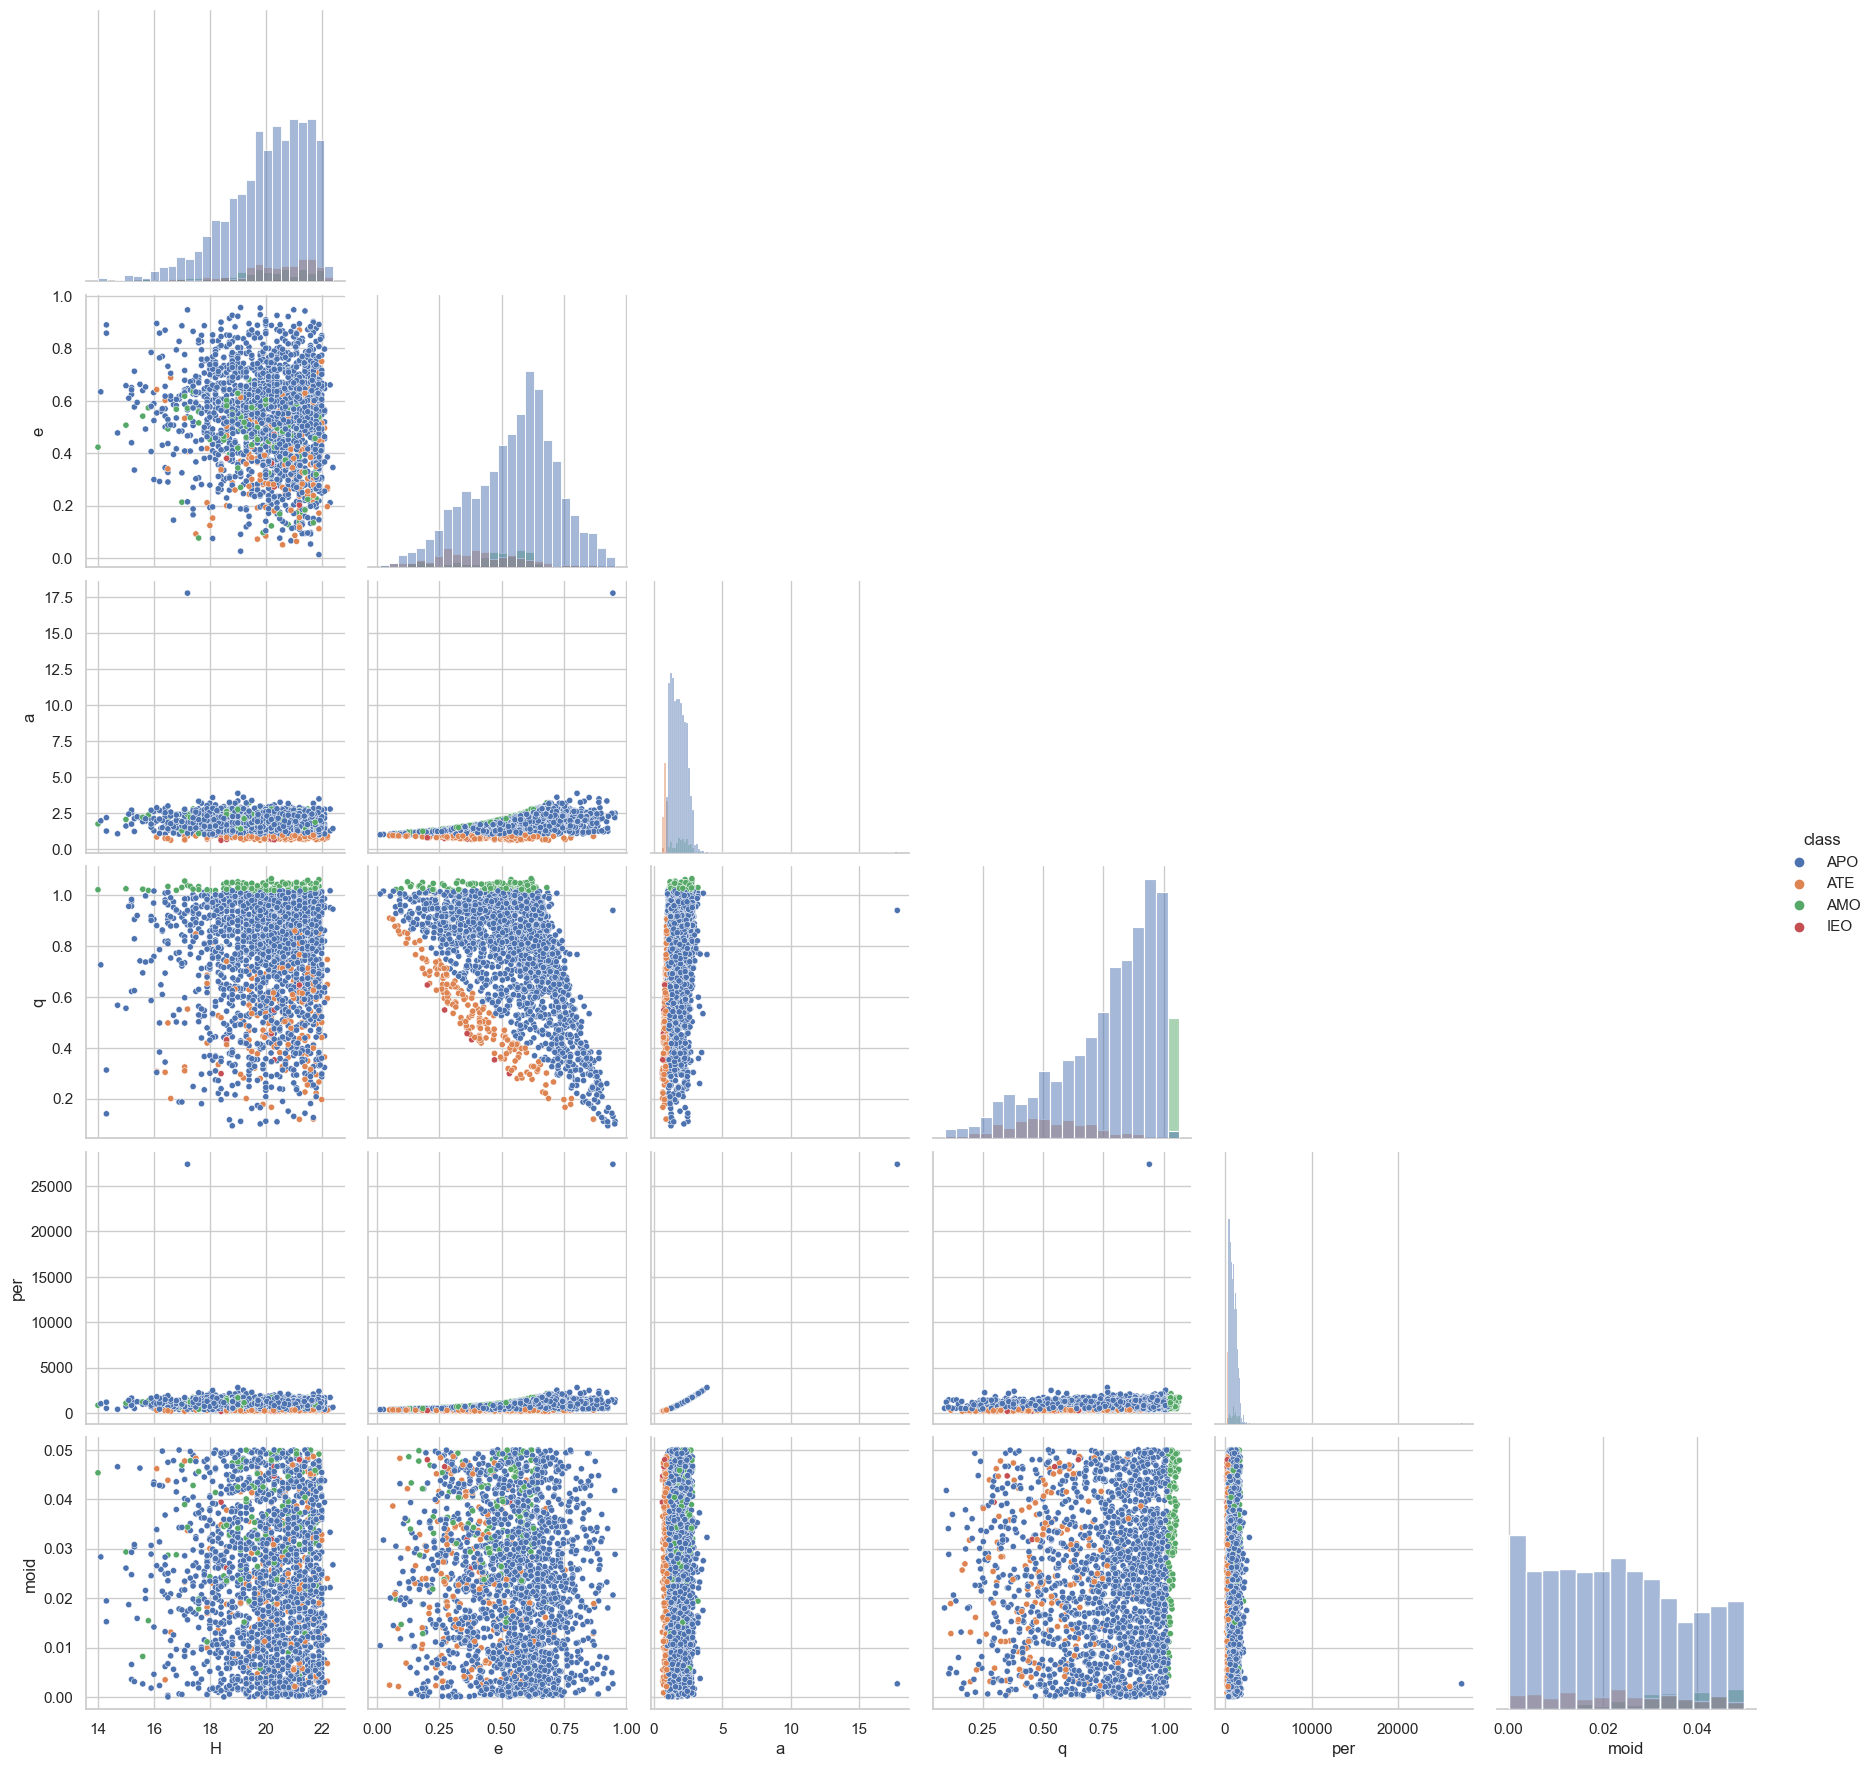

In [83]:
# Relationships between some of the main features
sns.pairplot(pha_df,
             hue='class',
             hue_order=['APO', 'ATE', 'AMO', 'IEO'],
             vars=['H', 'e', 'a', 'q', 'per', 'moid'],
             diag_kind='hist',
             height=3,
             corner=True,
             plot_kws={'s':20})
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


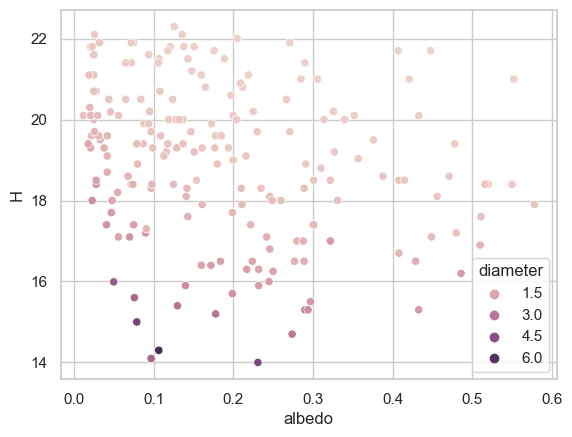

In [84]:
# Relationship between Albedo, Absolute magnitude and Diameter
sns.scatterplot(data=pha_df,
                x=pha_df['albedo'],
                y=pha_df['H'],
                hue=pha_df['diameter'])
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


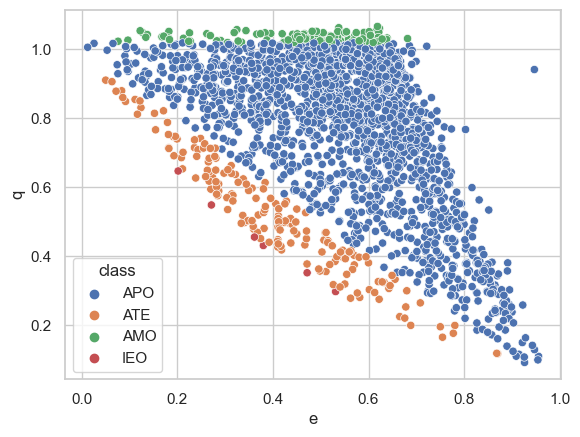

In [85]:
# Relationship between Eccentricity, Perihelion Distance and Class
sns.scatterplot(data=pha_df,
                x=pha_df['e'],
                y=pha_df['q'],
                hue=pha_df['class'],
                hue_order=['APO', 'ATE', 'AMO', 'IEO'])
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


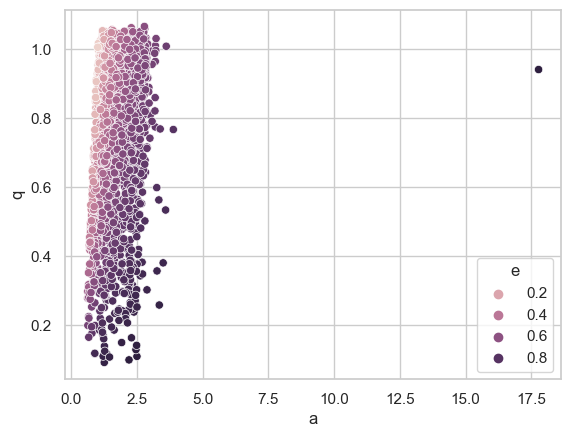

In [86]:
# Relationship between Semi-Major Axis, Eccentricity and Perihelion Distance
sns.scatterplot(data=pha_df,
                x=pha_df['a'],
                y=pha_df['q'],
                hue=pha_df['e'])
plt.show()

D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Repositórios\DataScience\.venvDataScience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

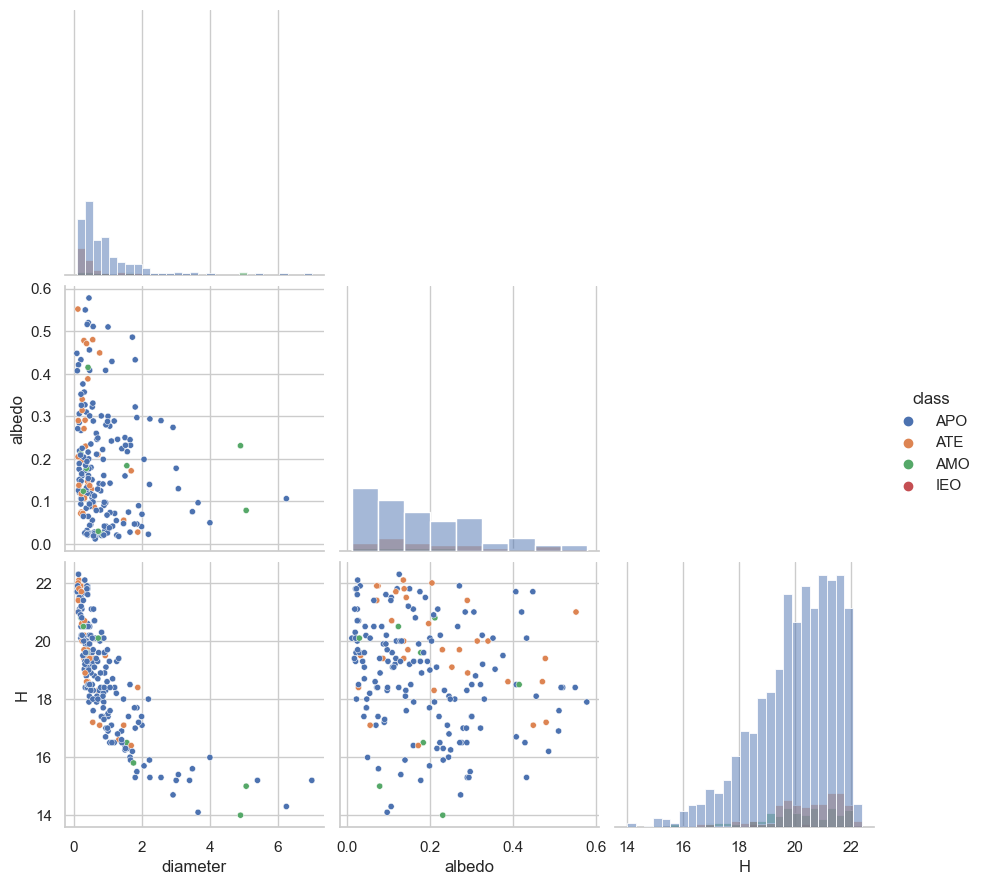

In [87]:
sns.pairplot(pha_df,
             hue='class',
             hue_order=['APO', 'ATE', 'AMO', 'IEO'],
             vars=['diameter', 'albedo', 'H'],
             diag_kind='hist',
             height=3,
             corner=True,
             dropna=True,
             plot_kws={'s':20})
plt.show()

In [88]:
# Means of all asteroids attributes by class
analysis_df[['H', 'diameter', 'albedo', 'epoch', 'e', 'a', 'q', 'i', 'n', 'tp', 'per', 'moid', 'class', 'rms']] \
.groupby('class', observed=False) \
.agg('mean') \
.sort_values(by='per') \
.dropna()

,H,diameter,albedo,epoch,e,a,q,i,n,tp,per,moid,rms
class,,,,,,,,,,,,,
ATE,23.890783,0.615705,0.230870,2.458669e+06,0.322565,0.888393,0.607594,12.501215,1.196551,2.458671e+06,306.761968,0.044074,0.479276
APO,23.302661,0.955645,0.173693,2.458232e+06,0.486946,1.719038,0.812918,11.815272,0.509805,2.458224e+06,850.384177,0.051150,0.692463
IMB,18.124292,2.299947,0.428031,2.458863e+06,0.075704,1.913861,1.768716,21.290628,0.372596,2.458860e+06,967.259504,0.807297,0.550530
MCA,18.497769,3.328693,0.188894,2.458526e+06,0.298173,2.260557,1.553101,14.996663,0.301746,2.458509e+06,1251.058238,0.602088,0.517860
AMO,22.020491,1.752030,0.173205,2.458479e+06,0.404434,2.063581,1.129404,13.555063,0.390388,2.458463e+06,1380.114268,0.166660,0.484619
MBA,16.794569,5.096487,0.133522,2.458898e+06,0.147999,2.682745,2.288270,8.388177,0.229572,2.458887e+06,1612.424308,1.300786,0.562286
OMB,15.730140,8.781382,0.066882,2.458790e+06,0.142824,3.380913,2.889034,11.281433,0.160371,2.458786e+06,2276.474094,1.909836,0.565836
AST,15.638690,13.044125,0.063286,2.457584e+06,0.441817,5.055573,2.825053,21.794221,0.087099,2.457400e+06,4155.694844,1.869157,0.521724
TJN,13.569104,20.780553,0.073928,2.458780e+06,0.073813,5.199812,4.816228,13.420841,0.083152,2.459338e+06,4331.211152,3.836287,0.562361


In [89]:
# Means of PHA's attributes by class
pha_df[['H', 'diameter', 'albedo', 'epoch', 'e', 'a', 'q', 'i', 'n', 'tp', 'per', 'moid', 'class', 'rms']] \
.groupby('class', observed=True) \
.agg('mean') \
.sort_values(by='per') \
.dropna()

,H,diameter,albedo,epoch,e,a,q,i,n,tp,per,moid,rms
class,,,,,,,,,,,,,
ATE,20.394799,0.489971,0.218394,2.458713e+06,0.401827,0.861456,0.520227,16.016335,1.259677,2.458714e+06,293.204464,0.023311,0.445855
APO,20.051605,0.947040,0.182990,2.458718e+06,0.551826,1.848267,0.766412,13.579326,0.461371,2.458722e+06,953.564689,0.022883,0.485614
AMO,19.885483,1.607300,0.164000,2.458914e+06,0.458799,2.036933,1.032545,14.082271,0.383997,2.458851e+06,1085.092183,0.035177,0.462691


### Multivariate Analysis Insights

- Only around 2% of the total Asteroids are flagged as NEO, but from those, around 9% are flagged as PHA
- Some of the graphs above show the interesting relationships between Semi-Major Axis, Perihelion Distance and even Eccentricity used to classify PHA's
- As expected, most PHA's have a low period since they are generally closer to earth, but there is a very interesting data point which shows a per over 25.000 days

### Asteroids with features similar to PHA's that are not flagged as PHA's

In [90]:
new_df = analysis_df[((analysis_df['neo'].eq('Y'))
                     & (analysis_df['pha'].eq('N')) 
                     & (analysis_df['a'] < 2)
                     & (analysis_df['i'] < 20.0)
                     & (analysis_df['class'].eq('APO') | analysis_df['class'].eq('ATE')) 
                     & (analysis_df['per'] < 365)
                     & (analysis_df['q'].between(0.09, 1.01))
                     & (analysis_df['moid'] < 0.001)
                    )]

In [91]:
len(new_df.index)

84

In [92]:
new_df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,rms
count,8.400000e+01,84.000000,0.0,0.0,0.0,8.400000e+01,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000
mean,6.627038e+06,26.897750,NaN,NaN,NaN,2.458579e+06,58578.440476,2.018909e+07,0.283012,0.887288,0.645363,4.305391,1.204729,2.458579e+06,2.018870e+07,306.421134,0.838935,0.000488,0.190023,4.038759e-02,0.458072
std,1.199598e+07,1.874429,NaN,NaN,NaN,1.262149e+03,1262.148688,3.419113e+04,0.142795,0.088381,0.166915,3.985092,0.213289,1.261968e+03,3.487863e+04,44.455754,0.121713,0.000296,0.115350,2.193879e-01,0.134242
min,2.367943e+06,22.100000,NaN,NaN,NaN,2.453100e+06,53100.000000,2.004040e+07,0.066958,0.610112,0.206775,0.013518,0.989223,2.453175e+06,2.004062e+07,174.065470,0.476565,0.000003,0.001331,1.103400e-07,0.149460
25%,3.548944e+06,25.675000,NaN,NaN,NaN,2.459000e+06,59000.000000,2.020053e+07,0.175250,0.848149,0.567358,0.964467,1.051444,2.458900e+06,2.020022e+07,285.305252,0.781123,0.000207,0.080407,1.061125e-05,0.360055
50%,3.742856e+06,26.900000,NaN,NaN,NaN,2.459000e+06,59000.000000,2.020053e+07,0.257091,0.902437,0.675610,3.082049,1.149728,2.458966e+06,2.020043e+07,313.131614,0.857308,0.000492,0.191505,1.064950e-04,0.441165
75%,3.825873e+06,28.325000,NaN,NaN,NaN,2.459000e+06,59000.000000,2.020053e+07,0.353212,0.957809,0.769543,6.219699,1.261864,2.459064e+06,2.020080e+07,342.386383,0.937403,0.000723,0.281425,3.871875e-04,0.547723
max,5.401722e+07,32.100000,NaN,NaN,NaN,2.459000e+06,59000.000000,2.020053e+07,0.701686,0.997562,0.911992,16.453176,2.068187,2.459167e+06,2.020111e+07,363.921895,0.996364,0.000999,0.388789,1.668100e+00,0.792340


In [93]:
new_df['class'].value_counts(dropna=False)

class
ATE    84
AMO     0
APO     0
AST     0
CEN     0
HYA     0
IEO     0
IMB     0
MBA     0
MCA     0
OMB     0
TJN     0
TNO     0
Name: count, dtype: int64

### Asteroids with the shortest period

In [94]:
# Asteroids with shortest period
analysis_df[(analysis_df['per'] < 175)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
748872,3638505,(2013 JX28),Y,N,20.100,NaN,NaN,NaN,JPL 15,2459000.5,59000.0,20200531.0,0.564036,0.600885,0.261964,10.761576,2.116006,2.459065e+06,2.020080e+07,170.131865,0.465796,0.068089,26.498040,1.458800e-07,IEO,0.52452
907180,3766081,(2016 XK24),Y,N,20.414,NaN,NaN,NaN,JPL 3,2457734.5,57734.0,20161212.0,0.734748,0.579570,0.153732,8.094889,2.233807,2.457662e+06,2.016093e+07,161.159828,0.441232,0.133575,51.983383,1.110300e+00,ATE,0.17250
944593,3837637,(2019 AQ3),Y,N,17.600,NaN,NaN,NaN,6,2459000.5,59000.0,20200531.0,0.314306,0.588650,0.403634,47.218587,2.182317,2.459041e+06,2.020071e+07,164.962254,0.451642,0.225583,87.790136,4.863100e-07,IEO,0.39806
945721,3838078,(2019 BE5),Y,N,25.100,NaN,NaN,NaN,JPL 8,2459000.5,59000.0,20200531.0,0.659125,0.610112,0.207972,1.436252,2.068187,2.458964e+06,2.020042e+07,174.065470,0.476565,0.000010,0.004059,2.202100e-07,ATE,0.45254
949290,3842903,(2019 LF6),Y,N,17.200,NaN,NaN,NaN,JPL 9,2459000.5,59000.0,20200531.0,0.429275,0.555425,0.316995,29.506457,2.381039,2.459006e+06,2.020061e+07,151.194515,0.413948,0.260823,101.504487,9.330600e-07,IEO,0.59153
957067,3985571,(2020 AV2),Y,N,16.400,NaN,NaN,NaN,JPL 13,2459000.5,59000.0,20200531.0,0.177083,0.555418,0.457063,15.872257,2.381082,2.459058e+06,2.020073e+07,151.191778,0.413941,0.346139,134.706915,2.696700e-04,IEO,0.40885


In [95]:
# Possibly Dangerous Asteroids with the shortest period
new_df[(new_df['per'] < 175)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
945721,3838078,(2019 BE5),Y,N,25.1,NaN,NaN,NaN,JPL 8,2459000.5,59000.0,20200531.0,0.659125,0.610112,0.207972,1.436252,2.068187,2.458964e+06,2.020042e+07,174.06547,0.476565,0.00001,0.004059,2.202100e-07,ATE,0.45254


### Asteroids with the shortest MOID

In [96]:
# Asteroids with shortest moid
analysis_df[(analysis_df['moid'] < 0.000004)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
572493,3177202,(2004 FH),Y,N,25.700,NaN,NaN,NaN,22,2459000.5,59000.0,20200531.0,0.288557,0.818470,0.582295,0.021556,1.331066,2.459125e+06,2.020100e+07,270.459949,0.740479,3.419650e-06,0.001331,1.103400e-07,ATE,0.22063
763332,3655730,(2014 AA),Y,N,30.900,NaN,NaN,NaN,JPL 9,2456658.5,56658.0,20140101.0,0.210903,1.161571,0.916592,1.410947,0.787291,2.456704e+06,2.014022e+07,457.264009,1.251921,4.544120e-07,0.000177,4.237800e-03,APO,0.55900
801101,3694131,(2014 UF56),Y,N,27.400,NaN,NaN,NaN,9,2459000.5,59000.0,20200531.0,0.589380,2.124579,0.872395,0.933290,0.318269,2.459256e+06,2.021021e+07,1131.117882,3.096832,3.556680e-06,0.001384,1.920100e-04,APO,0.41566
880965,3745511,(2016 EO28),Y,N,29.200,NaN,NaN,NaN,12,2459000.5,59000.0,20200531.0,0.306123,1.287942,0.893674,2.431866,0.674310,2.459006e+06,2.020061e+07,533.879169,1.461682,3.956310e-06,0.001540,1.835300e-04,APO,0.44594
958316,54016959,(2020 JJ),Y,N,29.966,NaN,NaN,NaN,JPL 2,2459000.5,59000.0,20200531.0,0.422028,1.506653,0.870803,11.192071,0.532947,2.459018e+06,2.020062e+07,675.489182,1.849389,3.516620e-06,0.001369,5.486100e-04,APO,0.35111


In [97]:
# Asteroids with shortest moid
new_df[(new_df['moid'] < 0.000004)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
572493,3177202,(2004 FH),Y,N,25.7,NaN,NaN,NaN,22,2459000.5,59000.0,20200531.0,0.288557,0.81847,0.582295,0.021556,1.331066,2.459125e+06,2.020100e+07,270.459949,0.740479,0.000003,0.001331,1.103400e-07,ATE,0.22063


# Featured Asteroids

1999 XS35 -- Long period and short moid
2019 BE5 -- Short period and possibly dangerous
2004 FH -- short moid and possibly dangerous
1999 RQ36 -- Bennu
2004 MN4 -- Apophis

### (1999 XS35)

In [98]:
analysis_df[(analysis_df['spkid'] == 3024715)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
547843,3024715,(1999 XS35),Y,Y,17.2,NaN,NaN,NaN,18,2459000.5,59000.0,20200531.0,0.947132,17.774243,0.939683,19.436503,0.013153,2.451458e+06,1.999101e+07,27370.649665,74.936755,0.002669,1.038839,0.000036,APO,0.47059


Altough it has a period of almost 75 years, this asteroid gets very close to earth, with a moid of about 0.0026 AU or 388 thousand kilometers.
It has a considerably eccentric orbit that goes beyond the planet Neptune (e > 0.94)

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=1999%20XS35&view=VOP

### (2019 BE5)

In [99]:
analysis_df[(analysis_df['spkid'] == 3838078)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
945721,3838078,(2019 BE5),Y,N,25.1,NaN,NaN,NaN,JPL 8,2459000.5,59000.0,20200531.0,0.659125,0.610112,0.207972,1.436252,2.068187,2.458964e+06,2.020042e+07,174.06547,0.476565,0.00001,0.004059,2.202100e-07,ATE,0.45254


This Atens Class Asteroid not only has features similar to those shown in the list of PHA's, but also have a very short MOID of about 0.00001 AU or 1500 kilometers. Another very interesting feature is its short period of 174 days, which means it gets close to earth twice each year.

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2019%20BE5&view=VOP

### (2004 FH)

In [100]:
analysis_df[(analysis_df['spkid'] == 3177202)]

,spkid,full_name,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,class,rms
572493,3177202,(2004 FH),Y,N,25.7,NaN,NaN,NaN,22,2459000.5,59000.0,20200531.0,0.288557,0.81847,0.582295,0.021556,1.331066,2.459125e+06,2.020100e+07,270.459949,0.740479,0.000003,0.001331,1.103400e-07,ATE,0.22063


This is another asteroid with features similar to PHA's, but the main feature is its moid of about 0.000003 AU or 450 kilometers, a very close approach every 270 days.

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2004%20FH&view=VOP

### Bennu (1999 RQ36)

In [101]:
asteroid_df[(asteroid_df['name'].eq('Bennu'))]

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
101954,a0101955,2101955,101955 Bennu (1999 RQ36),101955,Bennu,NaN,Y,Y,20.19,0.492,0.046,0.02,JPL 97,2455562.5,55562,20110101.0,J2000,0.203745,1.126391,0.896894,6.03494,2.060867,66.223068,101.703948,1.355888,0.824461,2.455439e+06,2.010083e+07,436.648728,1.195479,0.003223,1.254217,2.208200e-08,4.026100e-11,2.486000e-08,0.000003,0.000004,0.000006,0.000003,4.846400e-11,4.420300e-11,0.000003,2.341100e-08,APO,0.27502


Bennu was the target of OSIRIS-REx, the first asteroid sample return mission. It has a moid of around 0.003223 AU or 480 thousand kilometers and a period of around 430 days.

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=1999%20RQ36&view=VOP

https://science.nasa.gov/solar-system/asteroids/101955-bennu/

### Apophis (2004 MN4)

In [102]:
asteroid_df[(asteroid_df['name'].eq('Apophis'))]

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
99941,a0099942,2099942,99942 Apophis (2004 MN4),99942,Apophis,NaN,Y,Y,19.7,0.34,0.23,0.04,JPL 199,2454733.5,54733,20080924.0,J2000,0.191195,0.922438,0.746072,3.33137,204.446029,126.40188,180.429373,1.098804,1.112495,2.454895e+06,2.009030e+07,323.596949,0.88596,0.000316,0.122854,5.346100e-09,4.154700e-10,4.743900e-09,3.502500e-07,0.000021,0.000021,0.000005,4.949100e-10,7.516100e-10,0.000005,2.186300e-07,ATE,0.2745


When it was discovered in 2004, Apophis was identified as one of the most hazardous asteroids that could impact Earth. But that impact assessment changed after astronomers tracked Apophis and its orbit became better determined. It can get very close to earth at least once every year, with a moid of around 0.000316	AU or 47 thousand kilometers.

https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=apophis&view=VOP

https://science.nasa.gov/solar-system/asteroids/apophis/

# Conclusion

This project shows that a considerable amount of Potentially Hazardous Asteroids pass close to earth much more frequently than many people think, altough many of them have their orbits well defined. Even so, the continuous study of these space objects is of great importance because if, for any reason, there is an asteroid that really threatens to hit Earth, we need to know.

The mean diameter of PHA's shown in the data is around 900 meters, and the median is 550 meters. If an asteroid of this diameter would impact Earth the damage would be extremely severe, causing destruction in a radius of more than 1600 kilometers, without considering earthquakes and ejected material that would fall back to earth.

Even the smallest of those, with around 80 meters would be more powerful than the Tunguska, an event in 30 June of 1908 in which an asteroid of around 50 meters exploded above Eastern Siberia near the Tunguska river, flattening 80 million trees over an area of 2,150 square kilometers.

Fortunately, astronomers believe that all near-Earth rocks (and comets) larger than 1 km have already been found, and none is on the trajectory to hit us any time soon.

Beyond that, NASA's Dart Mission, the first space mission designed to test asteroid deflection, was successful, changing the orbit of the asteroid Dimorphos.

# Sources

- **Dataset:** https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset
- **Outliers:** http://data-science.tokyo/ed-e/ede1-5-6.html
- **Detection of Outliers:** https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/
- **JPL Solar System Dynamics:** https://ssd.jpl.nasa.gov/
- **NEO Groups:** https://cneos.jpl.nasa.gov/about/neo_groups.html
- **Center for NEO Studies:** https://cneos.jpl.nasa.gov/
- **Orbital Eccentricity:** https://en.wikipedia.org/wiki/Orbital_eccentricity
- **Albedo:** https://astronomy.swin.edu.au/cosmos/a/Albedo
- **Asteroid Size Estimator:** https://cneos.jpl.nasa.gov/tools/ast_size_est.html
- **Minimum orbital intersection distance: an asymptotic approach:** https://www.aanda.org/articles/aa/full_html/2020/01/aa36502-19/aa36502-19.html
- **Barycentric Dynamical Time:**: https://en.wikipedia.org/wiki/Barycentric_Dynamical_Time
- **Astronomical Unit:** https://www.britannica.com/science/astronomical-unit
- **Lunar Distance:** https://en.wikipedia.org/wiki/Lunar_distance_(astronomy)
- **Ecliptic Plane:** https://www.asteroidmission.org/galleries/word-of-the-week/ecliptic-plane/
- **Bennu:** https://science.nasa.gov/solar-system/asteroids/101955-bennu/
- **Apophis:** https://science.nasa.gov/solar-system/asteroids/apophis/
- **Asteroid Facts:** https://www.spacecampturkey.com/what-happens-if-an-asteroid-hits-earth
- **Asteroid Impact Facts:** https://www.space.com/asteroid-apocalypse-how-big-can-humanity-survive
- **Asteroid Fast Facts:** https://www.nasa.gov/solar-system/asteroids/asteroid-fast-facts/
- **Dart Mission:** https://www.nasa.gov/news-release/nasa-confirms-dart-mission-impact-changed-asteroids-motion-in-space/